# Feuille de travaux pratiques. Méthodes itératives de résolution des systèmes linéaires

In [3]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (utilisation des méthodes de Gauss-Seidel et de Jacobi, d'après A. Quarteroni)
Soit $n$ un entier naturel non nul et $\varepsilon$ un réel appartenant à l'intervalle $[0,1]$. On considère le système linéaire $A_\varepsilon x=b_\varepsilon$ d'ordre $n$, dans lequel
$$
A_\varepsilon=\begin{pmatrix}1&\varepsilon&\varepsilon^2&0&\cdots&0\\\varepsilon&1&\varepsilon&\ddots&\ddots&\vdots\\\varepsilon^2&\varepsilon&\ddots&\ddots&\ddots&0\\0&\ddots&\ddots&\ddots&\ddots&\varepsilon^2\\\vdots&\ddots&\ddots&\ddots&1&\varepsilon\\0&\cdots&0&\varepsilon^2&\varepsilon&1\end{pmatrix}\text{ et }b_\varepsilon=A_\varepsilon\begin{pmatrix}1\\1\\\vdots\\1\end{pmatrix}.
$$
La commande `A,b=systeme(n,epsilon)`, qui fait appel à la fonction codée ci-dessous, permet de construire les tableaux associés à la matrice $A_\varepsilon$ et au vecteur $b_\varepsilon$ pour des valeurs de l'entier $n$ et du réel $\varepsilon$ données.

In [4]:
def systeme(n,epsilon):
    A=np.eye(n)
    i,j=np.indices(A.shape)
    A[i==j-1]=epsilon
    A[i==j+1]=epsilon
    A[i==j-2]=epsilon**2
    A[i==j+2]=epsilon**2
    b=np.dot(A,np.ones(n))
    return A,b

On pose dans un premier temps $n=5$.

In [5]:
n=5

**1.** On sait que si la matrice $A_\varepsilon$ est à diagonale strictement dominante par lignes, alors la [méthode de Gauss-Seidel](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Gauss-Seidel), appliquée à la résolution du système ci-dessus, est convergente.

  **(a)** Vérifier que $A_r$ est bien à diagonale strictement dominante par lignes quand $\varepsilon=0,3$.

In [6]:
epsilon=0.3
A,b=systeme(n,epsilon)
D=np.diag(A)
if all(abs(D)>np.sum(abs(A-np.diag(D)),1)):
    print('La matrice est à diagonale dominante par lignes')
else:
    print('La matrice n\'est pas à diagonale dominante par lignes')
print(b)

La matrice est à diagonale dominante par lignes
[1.39 1.69 1.78 1.69 1.39]


**(b)** &Eacute;crire une fonction `gauss_seidel(A,b,x0,tol,itermax)` mettant en &oelig;uvre la méthode de Gauss-Seidel. Cette fonction renverra, en plus de la solution approchée, le nombre d'itérations nécessaires pour satisfaire le critère de convergence et la norme du résidu final.

In [7]:
def gauss_seidel(A,b,x0,tol,itermax):
# Résolution du système linéaire Ax=b par la méthode itérative de Gauss-Seidel.
# La matrice A du système doit être inversible et le second membre b doit être de taille compatible avec l'ordre de A.
# En entrée :
# le tableau x0 contient le premier terme de la suite des vecteurs itérés,
# le réel tol est la tolérance utilisée pour le critère d'arrêt,
# l'entier itermax est le nombre maximal d'itérations autorisées.
# En sortie :  
# le tableau x contient la solution approchée obtenue,
# l'entier iter contient le nombre d'itérations nécessaires pour atteindre la convergence,
# le réel relnr contient la norme du résidu relatif à la dernière itération.
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit être carrée.')
    # initialisation
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    print()
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) and (iter<itermax):
        iter=iter+1
        for i in range(n):
            r[i]=r[i]/A[i,i]
            for j in range(i+1,n):
                r[j]=r[j]-A[j,i]*r[i]
            x[i]=x[i]+r[i]
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return [x,iter,relnr]

**(c)** Utiliser cette fonction pour calculer avec une solution approchée du système ci-dessus, en utilisant le vecteur $x^{(0)}=\begin{pmatrix}0&0&0&0&0\end{pmatrix}^\top$ comme initialisation et une tolérance égale à $10^{-10}$ pour le critère d'arrêt.

In [8]:
x0=np.zeros(n)
tol=1e-10
itermax=1e3
[x,iter,res]=gauss_seidel(A,b,x0,tol,itermax)
print('Solution approchée obtenue après',iter,'itérations :',x,'.')


Solution approchée obtenue après 14 itérations : [1. 1. 1. 1. 1.] .


**2.** De la même manière, écrire une fonction `jacobi(A,b,x0,tol,itermax)` mettant en &oelig;uvre la [méthode de Jacobi](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Jacobi) et résoudre le système linéaire ci-dessus avec le même choix d'initialisation et de tolérance que précédemment. Quelle est la méthode la plus rapide ?

In [9]:
def jacobi(A,b,x0,tol,itermax):
# Résolution du système linéaire Ax=b par la méthode itérative de Jacobi.
# La matrice A du système doit être inversible et le second membre b doit être de taille compatible avec l'ordre de A.
# En entrée :
# le tableau x0 contient le premier terme de la suite des vecteurs itérés,
# le réel tol est la tolérance utilisée pour le critère d'arrêt,
# l'entier itermax est le nombre maximal d'itérations autorisées.
# En sortie :
# le tableau x contient la solution approchée obtenue,
# l'entier iter contient le nombre d'itérations nécessaires pour atteindre la convergence,
# le réel relnr contient la norme du résidu relatif à la dernière itération.
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit être carrée.')
    # initialisation
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) and (iter<itermax):
        iter=iter+1
        for i in range(n):
            x[i]=x[i]+r[i]/A[i,i]
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return [x,iter,relnr]

[x,iter,res]=jacobi(A,b,x0,tol,itermax)
print('Solution approchée obtenue après',iter,'itérations :',x,'.')

Solution approchée obtenue après 50 itérations : [1. 1. 1. 1. 1.] .


On a besoin d'effectuer plus de trois plus d'itérations avec la méthode de Jacobi qu'avec la méthode de Gauss-Seidel. La méthode la plus rapide est donc la méthode de Gauss-Seidel.

**3. (a)** Tracer le graphe des valeurs des rayons spectraux respectifs des matrices d'itération des méthodes de Jacobi et de Gauss-Seidel associées à $A_\varepsilon$ en fonction de celle du paramètre $\varepsilon$, pour $\varepsilon$ prenant des valeurs $0$ entre $1$.

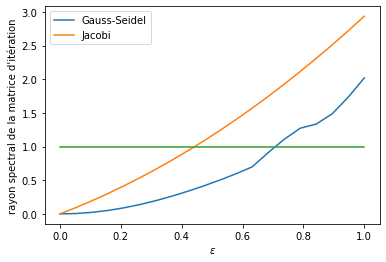

In [10]:
tabepsilon=np.linspace(0,1,20)
rayon_spectral_GS,rayon_spectral_J=np.zeros(tabepsilon.shape[0]),np.zeros(tabepsilon.shape[0])
for k in range(tabepsilon.shape[0]):
    A,b=systeme(n,tabepsilon[k])
    B_GS=-np.dot(np.linalg.inv(np.tril(A)),np.triu(A,1))
    [valp,vectp]=np.linalg.eig(B_GS)
    rayon_spectral_GS[k]=max(abs(valp))
    B_J=-np.dot(np.diag(1./np.diag(A)),(np.tril(A,-1)+np.triu(A,1)))
    [valp,vectp]=np.linalg.eig(B_J)
    rayon_spectral_J[k]=max(abs(valp))

fig=plt.figure()
plt.plot(tabepsilon,rayon_spectral_GS,label='Gauss-Seidel')
plt.plot(tabepsilon,rayon_spectral_J,label='Jacobi')
plt.plot(tabepsilon,np.ones(tabepsilon.shape[0]))
plt.xlabel(r'$\varepsilon$')
plt.ylabel('rayon spectral de la matrice d\'itération')
plt.legend()

**(b)** Que dire de la convergence des deux méthodes en fonction de la valeur de $\varepsilon$ ?

On observe sur la figure ci-dessus que le rayon spectral de la matrice d'itération de la méthode de Gauss-Seidel est toujours plus petit que celui de la matrice d'itération de la méthode de Jacobi. On confirme ainsi ce qui a été constaté à la question 2 pour le cas particulier $\varepsilon=0,3$: la convergence de la méthode de Gauss-Seidel est plus rapide que celle de la méthode de Jacobi pour ce problème. Par ailleurs, on voit encore que la méthode de Jacobi ne converge que si la valeur de $\varepsilon$ est inférieure à un nombre compris entre $0,4$ et $0,45$, alors que la méthode de Gauss-Seidel converge pour toute valeur de $\varepsilon$ inférieure à un nombre proche de $0,7$.

**(c)** Quelle méthode choisir pour résoudre le système lorsque $\varepsilon=0,5$ ? Utiliser la méthode sélectionnée et comparer le nombre d'itérations nécessaires à celui observé en 1.(c). Comment expliquer la différence constatée ?

Lorsque le paramètre $\varepsilon$ vaut $0,5$, on voit sur la figure ci-dessus que le rayon spectral de la matrice d'itération de la méthode de Jacobi est supérieur à $1$. Cette méthode ne converge donc pas et il faut lui préférer la méthode de Gauss-Seidel pour la résolution approchée dans ce cas.

In [11]:
A,b=systeme(n,0.5)
x0=np.zeros(n)
[x,iter,res]=gauss_seidel(A,b,x0,tol,itermax)
print('Solution approchée obtenue après',iter,'itérations :',x,'.')


Solution approchée obtenue après 27 itérations : [1. 1. 1. 1. 1.] .


L'augmentation du nombre d'itérations requises par rapport à la question 1.(c) s'explique par le fait que le rayon spectral de la matrice d'itération de la méthode a augmenté.

**4.** On pose à présent $n=100$. Pour $\varepsilon=0,3$ et $\varepsilon=0,35$, tracer (en utilisant la commande `semilogy` de Matplotlib) et comparer les graphes de la norme du résidu $r^{(k)}=b_\varepsilon-A_\varepsilon x^{(k)}$ en fonction du nombre d'itérations $1\leq k\leq 50$ pour la méthode de Jacobi (on modifiera pour cela la fonction précédemment écrite). Commenter en particulier la pente des courbes. Dans le cas où $\varepsilon=0,35$, estimer à partir du graphe le nombre d'itérations nécessaires pour que la norme du résidu soit plus petite que $10^{-10}$.

Nombre maximum d'itérations atteint sans que le critère d'arrêt soit satisfait.
Nombre maximum d'itérations atteint sans que le critère d'arrêt soit satisfait.


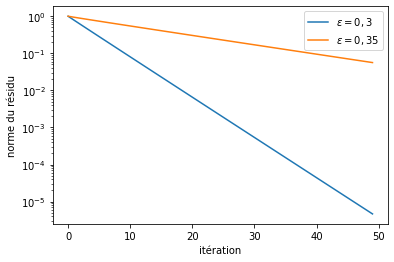

In [12]:
def jacobi_res(A,b,x0,tol,itermax):
# Résolution du système linéaire Ax=b par la méthode itérative de Jacobi.
# La matrice A du système doit être inversible et le second membre b doit être de taille compatible avec l'ordre de A.
# En entrée :
# le tableau x0 contient le premier terme de la suite des vecteurs itérés,
# le réel tol est la tolérance utilisée pour le critère d'arrêt,
# l'entier itermax est le nombre maximal d'itérations autorisées.
# En sortie :
# le tableau x contient la solution approchée obtenue,
# l'entier iter contient le nombre d'itérations nécessaires pour atteindre la convergence,
# le tableau res contient la norme du résidu relatif à chaque itération.
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit être carrée.')
    res=np.zeros(itermax)
    # initialisation
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) and (iter<itermax):
        res[iter]=relnr
        iter=iter+1
        for i in range(n):
            x[i]=x[i]+r[i]/A[i,i]
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.');
    return [x,iter,res]

n=100
x0=np.zeros(n)
itermax=50

A,b=systeme(n,0.3)
[x,iter,res1]=jacobi_res(A,b,x0,tol,itermax)

A,b=systeme(n,0.35)
[x,iter,res2]=jacobi_res(A,b,x0,tol,itermax)

fig=plt.figure()
plt.semilogy(res1,label='$\\varepsilon=0,3$')
plt.semilogy(res2,label='$\\varepsilon=0,35$')
plt.xlabel('itération')
plt.ylabel('norme du résidu')
plt.legend()

On observe sur la figure que la convergence est beaucoup moins rapide pour $\varepsilon=0,35$ car la pente du segment de droite correspant sur le graphe est moindre. Dans ce cas, la norme du résidu est à peu près divisée par 10 toutes les 40 itérations (à l'itération 10, la norme du résidu vaut environ 10, et environ 1 à l'itération 50). Il faudra donc environ 450 itérations pour obtenir une norme inférieure à $10^{-10}$.

## Exercice 2 (paramètre optimal de la méthode de sur-relaxation successive)
L'objectif de cet exercice est de déterminer un encadrement du paramètre de relaxation optimal de la [méthode de sur-relaxation successive](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_surrelaxation_successive) appliquée la résolution d'un système linéaire $Ax=b$ particulier.

**1.** &Eacute;crire, sur le modèle des fonctions de l'exercice précédent, une fonction `sor(A,b,omega,x0,tol,itermax)` mettant en &oelig;uvre la méthode de sur-relaxation successive.

In [13]:
def sor(A,b,omega,x0,tol,itermax):
# Résolution du système linéaire Ax=b par la méthode itérative de sur-relaxation successive.
# La matrice A du système doit être inversible et le second membre b doit être de taille compatible avec l'ordre de A.
# En entrée :
# le réel omega non nul est le paramètre de relaxation de la méthode,
# le tableau x0 contient le premier terme de la suite des vecteurs itérés,
# le réel tol est la tolérance utilisée pour le critère d'arrêt,
# l'entier itermax est le nombre maximal d'itérations autorisées.
# En sortie :  
# le tableau x contient la solution approchée obtenue,
# l'entier iter contient le nombre d'itérations nécessaires pour atteindre la convergence,
# le réel relnr contient la norme du résidu relatif à la dernière itération.
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit être carrée.')
    if omega==0.:
        raise ValueError('Le paramètre de relaxation doit être non nul.')
    # initialisation
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) and (iter<itermax):
        iter=iter+1
        for i in range(n):
            r[i]=omega*r[i]/A[i,i]
            for j in range(i+1,n):
                r[j]=r[j]-A[j,i]*r[i]
            x[i]=x[i]+r[i]
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return [x,iter,relnr]


On souhaite utiliser la méthode pour résoudre un système linéaire résultant de la discrétisation par une méthode de différences finies d'un [problème de Poisson](https://fr.wikipedia.org/wiki/%C3%89quation_de_Poisson), posé dans le carré unité, avec des conditions aux limites de Dirichlet homogènes et un second membre qui est la fonction constante égale à $1$. Ce problème modélise, de manière statique, la déformation d'une membrane élastique carrée, fixée en ses quatre côtés et soumise à une charge uniformément répartie en surface.

On utilise $n$ points de discrétisation dans chaque direction d'espace, le système linéaire à résoudre ayant alors $(n-2)^2$ inconnues. On choisit dans un premier temps la valeur $n=6$.

In [14]:
# nombre de points de discrétisation dans chaque direction d'espace
n=6
# nombre d'inconnues du système linéaire
N=(n-2)**2
K=2*np.eye(n-2)-np.diag(np.ones(n-3),1)-np.diag(np.ones(n-3),-1)
I=np.eye(n-2)
# matrice du système linéaire
A=(np.kron(K,I)+np.kron(I,K))*(n-1)**2

**2.** Utiliser la méthode pour résoudre le système linéaire $Ax=b$ en faisant varier le paramètre de relaxation entre $1,2$ et $1,4$ par pas de longueur $10^{-5}$. Déterminer ainsi la valeur optimale du paramètre de relaxation. On choisira une approximation initiale nulle et on fixera la tolérance égale à $10^{-12}$ et le nombre d'itérations maximal égal à $1000$.

La valeur optimale du paramètre obtenue numériquement est :  1.2612530626531326 .


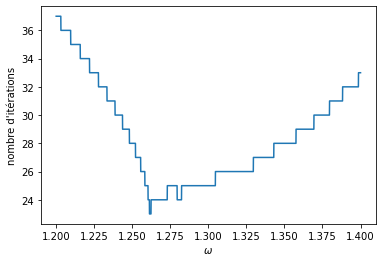

In [17]:
# second membre du système linéaire
b=np.ones(N)
# initialisation
x0=np.zeros(N)

omega_min,omega_max=1.2,1.4
ntrials=int((omega_max-omega_min)/(1e-5))+1
omegas=np.linspace(omega_min,omega_max,ntrials)
niter=np.zeros(ntrials)
for i in range(ntrials):
    [x,niter[i],relnr]=sor(A,b,omegas[i],x0,1e-12,1e3)
plt.plot(omegas,niter)
plt.xlabel(r'$\omega$')
plt.ylabel('nombre d\'itérations')
index=np.argmin(niter)
print('La valeur optimale du paramètre obtenue numériquement est : ',omegas[index],'.')

La matrice du système considéré ci-dessus fait partie d'une classe de matrices pour lesquelles la valeur optimale du paramètre de relaxation est connue explicitement et vaut
$$
\omega_o=\frac{2}{1+\sqrt{1-\rho(B_J)^2}},
$$
où $\rho(B_J)$ est le rayon spectral de la matrice d'itération de la méthode de Jacobi associée.

**3.** Calculer la valeur du paramètre optimal et comparer avec l'encadrement trouvé heuristiquement dans la précédente question.

In [20]:
rhoBj=max(np.abs(np.linalg.eigvals(np.dot(np.diag(1./np.diag(A)),A-np.diag(np.diag(A))))))

print('La valeur optimale du paramètre de relaxation obtenue par calcul numérique vaut',2./(1.+np.sqrt(1.-rhoBj**2)),'.')

La valeur optimale du paramètre de relaxation obtenue par calcul numérique vaut 1.2596161836824997 .


On notera que le rayon spectral de la matrice d'itération de la méthode de Jacobi associée à la matrice $A$ issue de la discrétisation du problème de Poisson-Dirichlet introduit ci-desssus peut être analytiquement déterminé et vaut dans ce cas particulier $\cos\left(\frac{\pi}{n-1}\right)$.

In [21]:
omega_opt=2./(1.+np.sqrt(1.-np.cos(np.pi/(n-1))**2))
print('La valeur optimale du paramètre de relaxation théorique vaut',omega_opt,'.')

La valeur optimale du paramètre de relaxation théorique vaut 1.2596161836824997 .


**4.** Le code ci-dessous permet de représenter graphiquement, au moyen une élévation verticale, une solution approchée de l'équation de Poisson avec conditions aux limites de Dirichlet homogènes, la solution du système linéaire correspondant à la discrétisation du problème étant stockée dans le tableau `x`. Afficher l'approximation obtenue pour $n=15$.

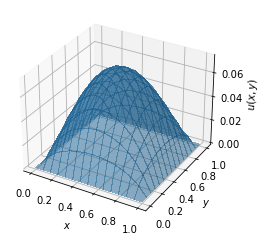

In [22]:
from mpl_toolkits import mplot3d

n=15
N=(n-2)**2

K=2*np.eye(n-2)-np.diag(np.ones(n-3),1)-np.diag(np.ones(n-3),-1)
I=np.eye(n-2)
A=(np.kron(K,I)+np.kron(I,K))*(n-1)**2

b=np.ones(N)
x0=np.zeros(N)
[x,niter[i],relnr]=sor(A,b,np.cos(np.pi/(n-1)),x0,1e-8,1e3)

xx,yy=np.linspace(0.,1.,n),np.linspace(0.,1.,n)
X,Y=np.meshgrid(xx,yy)
Z=np.zeros((n,n))
Z[1:n-1,1:n-1]=x.reshape((n-2,n-2))

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,linewidth=0,antialiased=False,alpha=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$u(x,y)$')
plt.show()

## Exercice bonus (méthodes de Richardson, d'après G. Allaire et S. M. Kaber)

Dans cet exercice, on considère la résolution d'un système linéaire $Ax=b$ issu de la discrétisation du problème de Poisson sur le segment unité, avec des conditions aux limites de Dirichlet homogènes et un second membre égal à la fonction $t\mapsto t\sin(t)$, par une méthode de Richardson.

En supposant que l'on utilise $n$ points de discrétisation sur le segment, le système linéaire possède dans ce cas $n-2$ inconnues. On choisit la valeur $n=12$.

In [ ]:
# nombre de points de discrétisation sur le segment
n=12
# nombre d'inconnues du système linéaire
N=n-2
# matrice du système linéaire
A=(2*np.eye(N)-np.diag(np.ones(N-1),1)-np.diag(np.ones(N-1),-1))*(n-1)**2

On considère tout d'abord la méthode de Richardson stationnaire.

**1.** &Eacute;crire, sur le modèle des fonctions des exercices précédents, une fonction `richardson_stationnaire(A,b,alpha,x0,tol,itermax)` mettant en &oelig;uvre la méthode de Richardson stationnaire.

In [ ]:
def richardson_stationnaire(A,b,alpha,x0,tol,itermax):
    m,n=A.shape
    if n!=m:
        raise ValueError ('La matrice doit être carrée.')
    if alpha ==0.:
        raise ValueError ('Le paramètre ne doit pas être nul.')
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) & (iter<itermax):
        iter=iter+1
        x=x+alpha*r
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return [x,iter,relnr]

**2.** Résoudre le système linéaire avec la méthode de Richardson stationnaire et une valeur du paramètre de la méthode égale à $10^{-4}$. On choisira une approximation initiale nulle et on fixera la tolérance égale à $10^{-4}$ et le nombre d'itérations maximal à $10000$. On pourra comparer la solution obtenue avec celle calculée par la commande `linalg.solve(A,b)` de NumPy.

In [ ]:
# second membre du système linéaire
xx=np.linspace(0,1,n)
b=xx[1:n-1]*np.sin(xx[1:n-1])
# initialisation
x0=np.zeros(N)
[x,iter,relnr]=richardson_stationnaire(A,b,1e-4,x0,1e-4,1e5)
print('nombre d\'itérations nécessaires :',iter)
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

On peut représenter graphiquement l'approximation de la solution du problème de Poisson calculée.

In [ ]:
plt.plot(xx,np.concatenate(([0.],x,[0.])))
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x)$')

La matrice $A$ du système étant réelle symétrique définie positive, on sait que la méthode est convergente pour toute valeur du paramètre $\alpha$ telle que
$$
0<\alpha<\frac{2}{\lambda_\max}
$$
et que la valeur optimale du paramètre $\alpha$ de la méthode de Richardson est
$$
\alpha_o=\frac{2}{\lambda_\max+\lambda_\min},
$$
    où $\lambda_\max$ et $\lambda_\min$ sont respectivement la plus grande et la plus petite valeur propre de $A$. Les valeurs propres de la matrice $A$ sont par ailleurs données par
$$
4(n-1)^2\sin\left(\frac{i\pi}{2(n-1)}\right)^2,\ i=1,\dots,n-2.
$$

**2.** Utiliser la méthode de Richardson stationnaire pour résoudre le système linéaire $Ax=b$ en faisant varier le paramètre de la méthode entre $32\times10^{-4}$ et $42\times10^{-4}$ par pas de longueur $10^{-5}$. On choisira une approximation initiale nulle et on fixera la tolérance égale à $10^{-10}$ et le nombre d'itérations maximal à $10000$. Déterminer ainsi la valeur conduisant au nombre minimal d'itérations effectuées et la comparer à la valeur théorique $\alpha_o$.

In [ ]:
alpha_min,alpha_max=32e-4,42e-4
ntrials=int((alpha_max-alpha_min)/(1e-5))+1
alphas=np.linspace(alpha_min,alpha_max,ntrials)
niter=np.zeros(ntrials)
for i in range(ntrials):
    [x,niter[i],relnr]=richardson_stationnaire(A,b,alphas[i],x0,1e-10,1e5)
plt.semilogy(alphas[0:ntrials],niter)
plt.xlabel(r'$\alpha$')
plt.ylabel('nombre d\'itérations')
index=np.argmin(niter)
print('La valeur optimale du paramètre de la méthode de Richardson stationnaire déterminée numériquement est : ',alphas[index])

On déduit de la croissance de la fonction $\sin^2$ sur l'intervalle $\left[0,\frac{\pi}{2}\right]$ que $\lambda_\max$ est obtenue en prenant $i=n-2$ dans la formule ci-dessus et $\lambda_\min$ en prenant $i=1$.

In [ ]:
alpha_opt=2./(4*(n-1)**2*(np.sin(np.pi/(2*(n-1)))**2+np.sin((n-2)*np.pi/(2*(n-1)))**2))
print('La valeur optimale du paramètre de la méthode de Richardson stationnaire théorique est ',alpha_opt,'.')

Pour améliorer la méthode, on se propose de faire varier le paramètre $\alpha$ à chaque étape, la méthode étant alors dite <i>instationnaire</i>.
À chaque itération, on choisit la valeur de $\alpha^{(k)}$ minimisant la forme quadratique
$$
q(x^{(k+1)})=\frac{1}{2}(x^{(k+1)})^\top Ax^{(k+1)}-(x^{(k+1)})^\top b,\text{ avec }x^{(k+1)}=x^{(k)}+\alpha r^{(k)}.
$$
On peut en effet montrer que minimiser $q(x)$ équivaut à résoudre le système linéaire $Ax=b$ et l'on vise par conséquent à minimiser à chape étape la forme quadratique le long de la direction donnée par le résidu courant $r^{(k)}$. En dérivant l'expression ci-dessus par rapport à $\alpha$ et cherchant la valeur de $\alpha$ annnulant cette dérivée, on trouve
$$
\alpha^{(k)}=\frac{{\|r^{(k)}\|_2}^2}{(r^{(k)})^\top Ar^{(k)}}.
$$

**4.** &Eacute;crire, sur le modèle de la précédente fonction, une fonction `richardson_instationnaire(A,b,x0,tol,itermax)` mettant en &oelig;uvre la méthode de Richardson instationnaire dans laquelle la valeur du paramètre de la méthode est donnée à chaque itération par la formule ci-dessus. Comparer alors les deux méthodes de Richardson, notamment en termes du nombre d'itérations, en utilisant les paramètres numériques de la question précédente et la valeur optimale $\alpha_o$ pour la méthode stationnaire.

In [ ]:
def richardson_instationnaire(A,b,x0,tol,itermax):
    m,n=A.shape
    if n!=m:
        raise ValueError ('La matrice doit être carrée.')
    iter=0
    x=x0.copy()
    r=b-np.dot(A,x)
    nr0=np.linalg.norm(r)
    relnr=np.linalg.norm(r)/nr0
    while (relnr>tol) & (iter<itermax):
        alpha=np.linalg.norm(r)**2/np.dot(r,np.dot(A,r))
        iter=iter+1
        x=x+alpha*r
        r=b-np.dot(A,x)
        relnr=np.linalg.norm(r)/nr0
    if (relnr>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return [x,iter,relnr]

In [ ]:
[x,iter,relnr]=richardson_stationnaire(A,b,alpha_opt,x0,1e-10,1e5)
print('nombre d\'itérations nécessaires pour la méthode de Richardson stationnaire :',iter)
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

[x,iter,relnr]=richardson_instationnaire(A,b,x0,1e-10,1e5)
print('nombre d\'itérations nécessaires pour la méthode de Richardson instationnaire :',iter)
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))